In [14]:
from facet_ml.classification import cnn
import pandas as pd
import cv2
from facet_ml.segmentation import segmenter
from pathlib import Path
import torch
from torch import nn
from torchvision.models import resnet152

In [51]:
## Define an image path
image = Path("../../../") / "Images" / "4 nM 1.bmp"

## Open segmenter
seg = segmenter.ImageSegmenter(str(image),segmenter="segment_anything",segmenter_kwargs={"device":"cpu"})

## Use segmenter to get dataset
ds = cnn.ColloidalDataset.from_image_segmenter(seg)

C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\facet_ml\segmentation\features.py:521: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(rotated_x, rotated_y, 2)
C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\facet_ml\segmentation\features.py:521: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(rotated_x, rotated_y, 2)
C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\facet_ml\segmentation\features.py:521: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(rotated_x, rotated_y, 2)
C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\facet_ml\segmentation\features.py:521: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(rotated_x, rotated_y, 2)
C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\facet_ml\segmentation\features.py:521: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(rotated_x, rotated_y, 2)
C:\Users\Jacob\Desktop\Academi

In [52]:
# Load dthe model of interest
# model = cnn.UNet(3,3)
model = resnet152()
model.fc = nn.Linear(model.fc.in_features, 3)
model.load_state_dict(torch.load("resnet_classifier.pth"))
model = model.float()

torch.Size([1, 3, 256, 256]) torch.float32
tensor([[ 0.1438, -0.6963,  1.9517]], grad_fn=<ViewBackward0>)


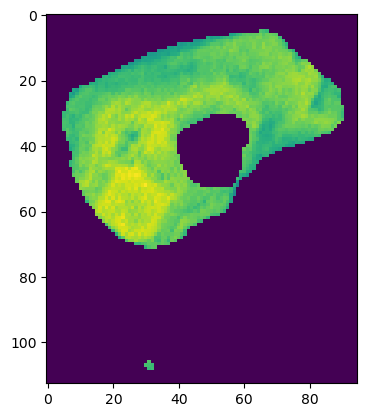

In [58]:
ii=5
input_val = torch.tensor(ds[ii][0])
t = cnn.get_transform(train=False)()
input_tensor = t(input_val).unsqueeze(0)
print(input_tensor.shape,input_tensor.dtype)
out = model(input_tensor)
import matplotlib.pyplot as plt
plt.imshow(input_val)
print(out)

torch.Size([1, 3, 256, 256]) torch.float32
tensor([[ 0.4203, -0.5776,  1.1736]], grad_fn=<ViewBackward0>)
torch.Size([1, 3, 256, 256]) torch.float32
torch.Size([1, 3, 256, 256]) torch.float32
tensor([[ 0.1507, -0.6924,  1.9198]], grad_fn=<ViewBackward0>)
torch.Size([1, 3, 256, 256]) torch.float32
tensor([[ 0.2517, -0.6556,  1.6677]], grad_fn=<ViewBackward0>)
torch.Size([1, 3, 256, 256]) torch.float32
tensor([[ 0.3190, -0.6195,  1.4514]], grad_fn=<ViewBackward0>)
torch.Size([1, 3, 256, 256]) torch.float32
tensor([[ 0.1438, -0.6963,  1.9517]], grad_fn=<ViewBackward0>)
torch.Size([1, 3, 256, 256]) torch.float32
tensor([[-0.1524, -0.8292,  2.7924]], grad_fn=<ViewBackward0>)
torch.Size([1, 3, 256, 256]) torch.float32
tensor([[ 0.3474, -0.6064,  1.3670]], grad_fn=<ViewBackward0>)
torch.Size([1, 3, 256, 256]) torch.float32
tensor([[ 0.1006, -0.7171,  2.0760]], grad_fn=<ViewBackward0>)
torch.Size([1, 3, 256, 256]) torch.float32
tensor([[ 0.1859, -0.6818,  1.8421]], grad_fn=<ViewBackward0>)
tor

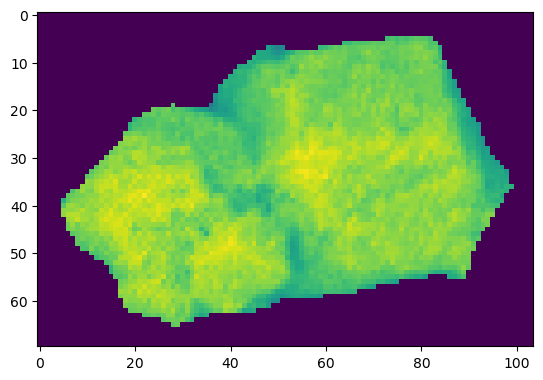

In [62]:
for ii in range(len(ds)):
    input_val = torch.tensor(ds[ii][0])
    t = cnn.get_transform(train=False)()
    input_tensor = t(input_val).unsqueeze(0)
    print(input_tensor.shape,input_tensor.dtype)
    out = model(input_tensor)
    if torch.argmax(out) == 2:
        import matplotlib.pyplot as plt
        plt.imshow(input_val)
        print(out)
        # break

In [34]:
x = input_val
for i, layer in enumerate(model.children()):
    try:
        x = layer(x)
    except RuntimeError as e:
        print(f"Error at layer {i} ({layer}): {e}")
        break


Error at layer 0 (ModuleList(
  (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
  (1): SegDoubleConv(
    (conv): Sequential(
      (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
  )
  (2): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
  (3): SegDoubleConv(
    (conv): Sequential(
      (0): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
  )
  (4): ConvTranspose2d(256, 128, kernel_size=(2, 2), stride=(2, 2))
  (5): SegDoubleConv(
    (conv): Sequential(
      (0): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1)